#✅ Project Title — Customer Churn Prediction using Machine learning (Telco Dataset)

**Author** : Umar Kazi (Linkedin: https://www.linkedin.com/in/umar-kazi18)

**Tech Stack**: Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn

**Project Type**: End-to-End ML Classification Project



This project develops a machine learning model to predict customer churn for a telecom company using demographic, service-usage, and billing attributes. The workflow includes data preprocessing, encoding, feature engineering, model training, and evaluation. The goal is to help business teams proactively identify customers likely to leave and enable targeted retention strategies.

🚀 **Skills Demonstrated**

Machine Learning • Data Analytics • Data Preprocessing • Feature Engineering • Classification Models • Model Evaluation • Business Analytics • Python • Scikit-learn • Deployment-ready ML pipeline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Descriptive Analysis**

In [3]:
path="Insert gdrive path of dataset"

In [25]:
df=pd.read_csv(path)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**Data Cleaning and Preprocessing**

1)Handling null values

In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Fortunately,There are no null values present .Lets go for checking duplicates

2)Duplicates check

In [6]:
df.duplicated().sum()

np.int64(0)

**There are no duplicates present ,lets go for Normalizing values and datatypes**

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Lets first remove unwanted columns from dataset

In [7]:
df.drop(columns=['customerID'],inplace=True)

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can observe that there are many categorical variables present ,Lets convert them to binary or numerical values .This can be done using LabelEncoder or One hot encoding .

In [9]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [33]:
objects=df.select_dtypes(include='object')
objects

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [34]:
for i in objects:
  unique=df[i].unique()
  print(f"Unique values in {i} are {unique}")

Unique values in gender are ['Female' 'Male']
Unique values in Partner are ['Yes' 'No']
Unique values in Dependents are ['No' 'Yes']
Unique values in PhoneService are ['No' 'Yes']
Unique values in MultipleLines are ['No phone service' 'No' 'Yes']
Unique values in InternetService are ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity are ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup are ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection are ['No' 'Yes' 'No internet service']
Unique values in TechSupport are ['No' 'Yes' 'No internet service']
Unique values in StreamingTV are ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies are ['No' 'Yes' 'No internet service']
Unique values in Contract are ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling are ['Yes' 'No']
Unique values in PaymentMethod are ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Tot

In [35]:
objects.drop(columns=['TotalCharges'],inplace=True)

In [ ]:
objects.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


**Lets transform Categorical variables**

In [13]:
objects.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
#for i in objects:
 # df[i]=label.fit_transform(df[i])

In [15]:
import joblib

In [16]:
label_encoders = {}
for col in objects:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le     # store encoder

# SAVE DICTIONARY OF ALL ENCODERS
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [10]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [12]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [11]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [13]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


**Now,we have successfully Cleaned and preprocessed data.Now lets go for Exploratory Data Analysis(EDA) for more understanding the distribution of data and insights.**

**EDA**

1)Distribution of churn (0 vs 1)

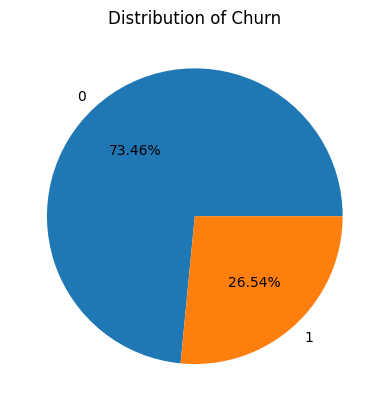

In [ ]:
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,autopct='%1.2f%%')
plt.title('Distribution of Churn')
plt.show()

**Here, we can get to know that About 27% of customers have shifted to another company**

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

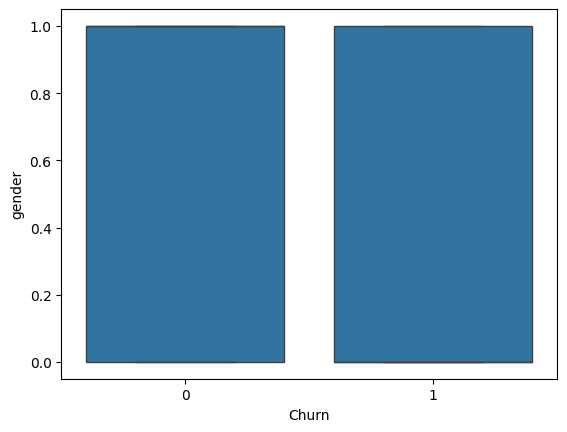

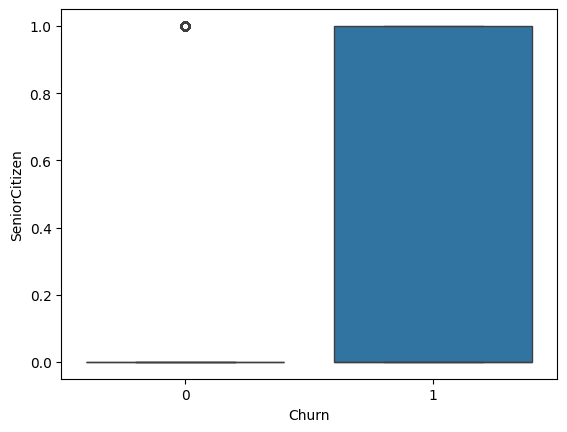

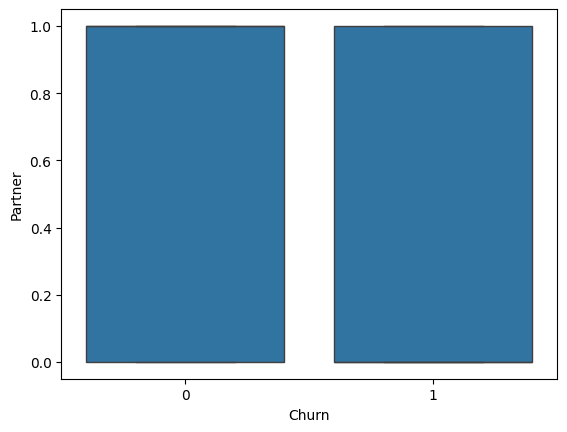

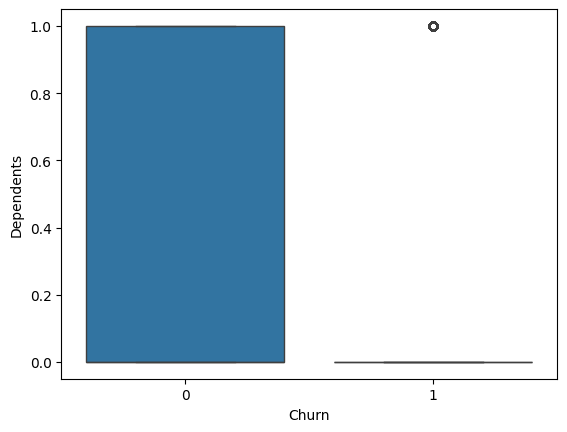

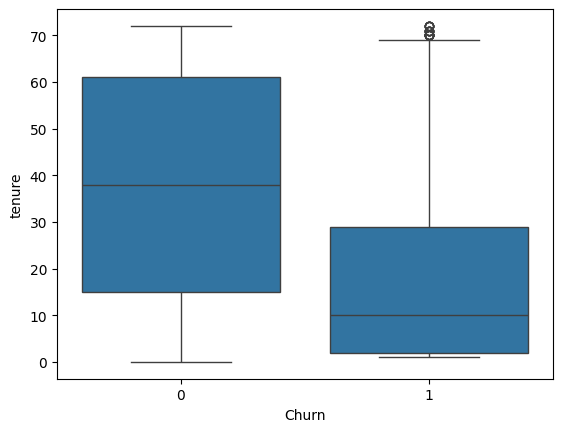

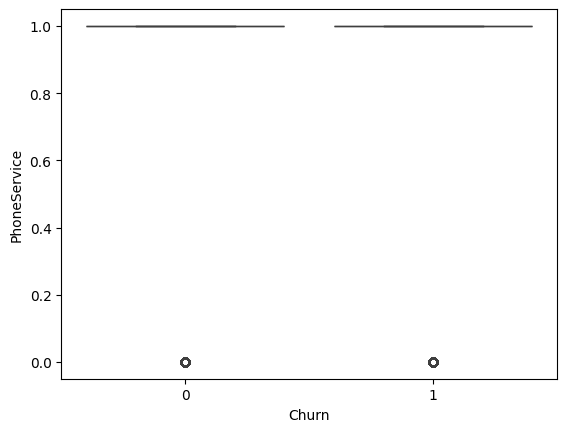

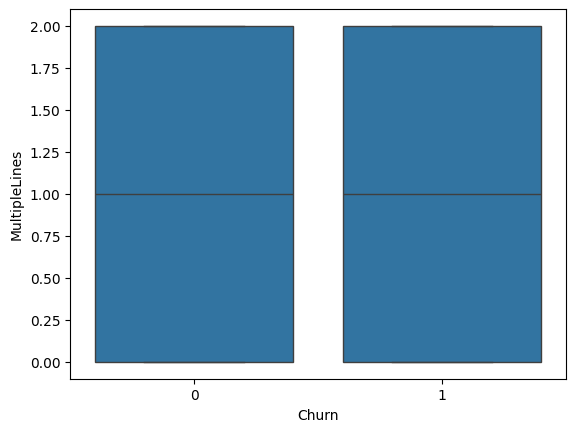

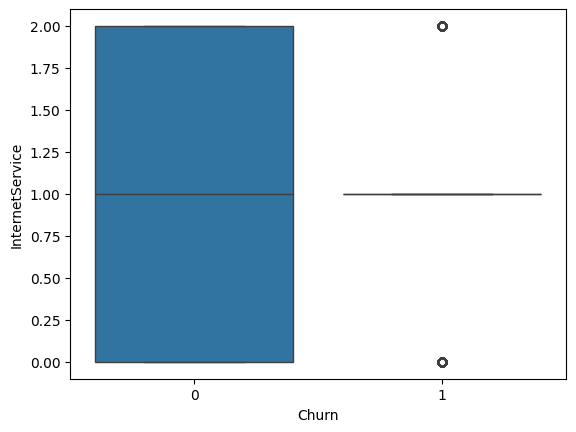

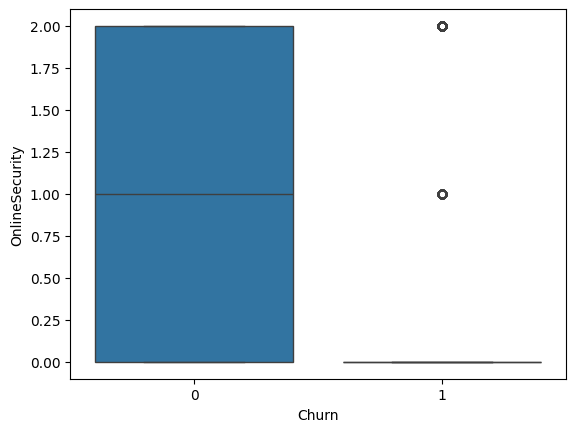

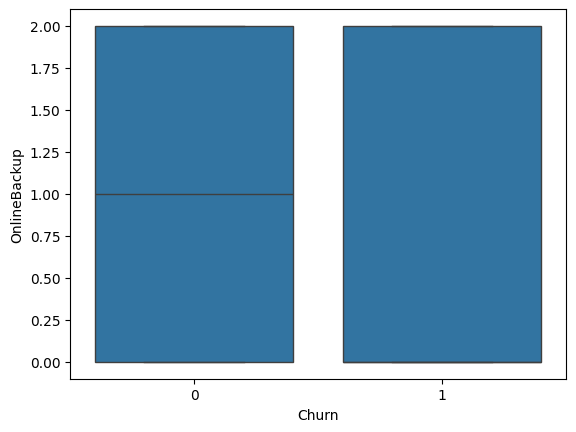

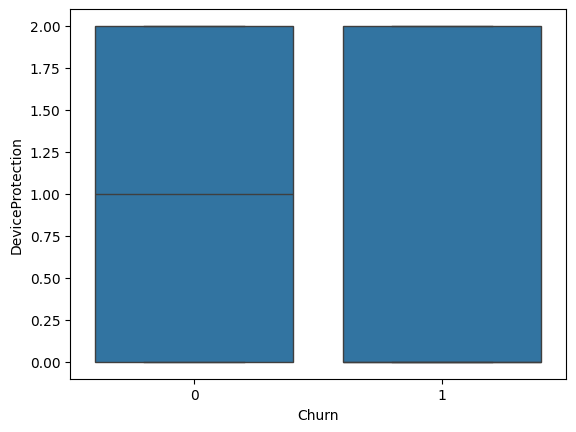

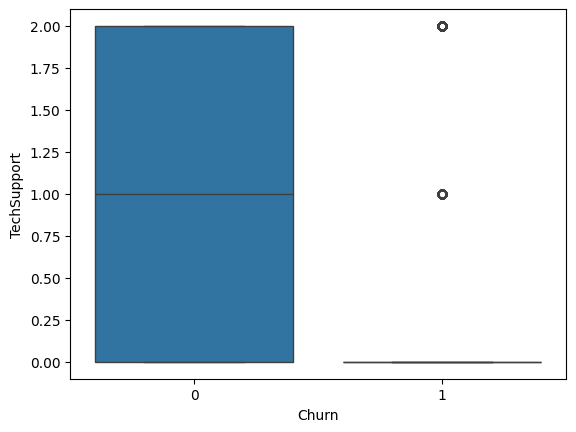

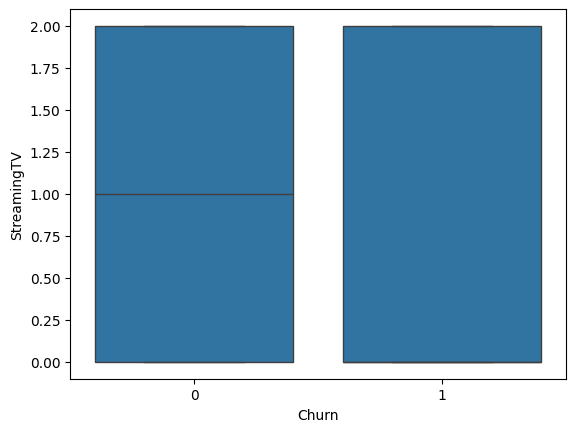

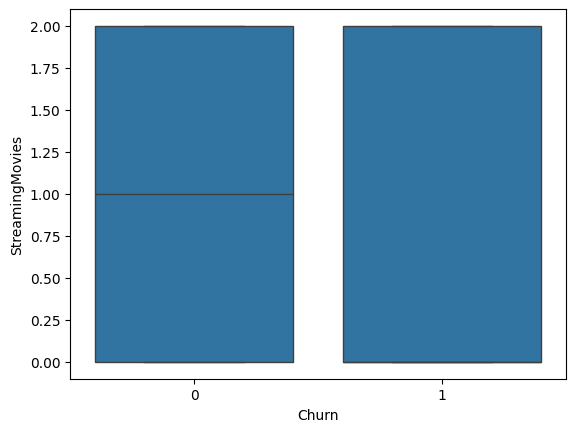

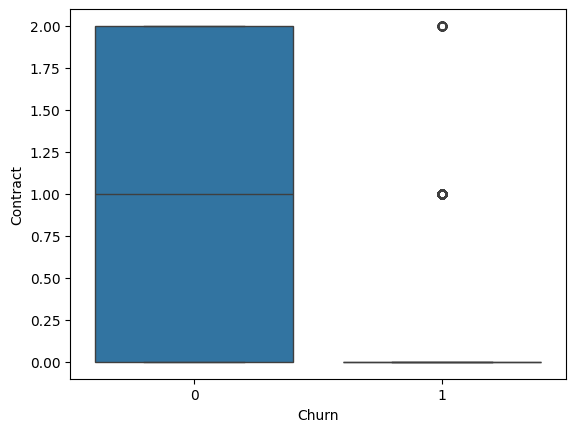

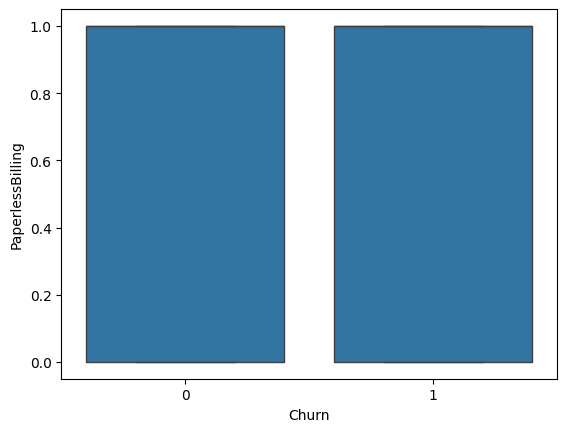

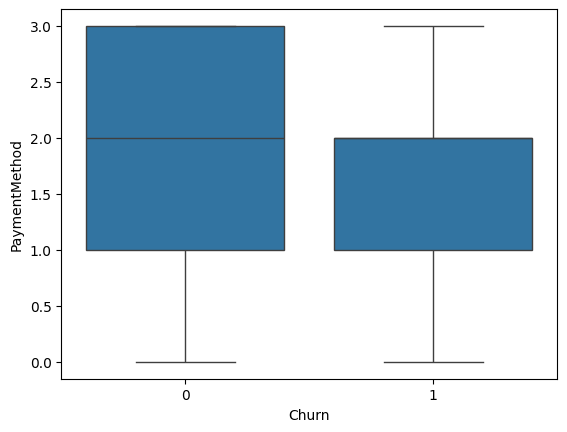

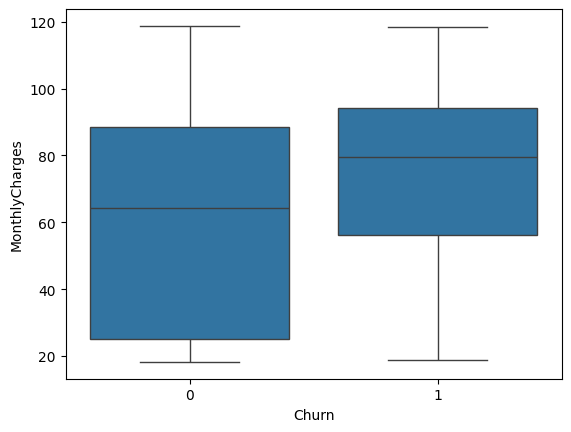

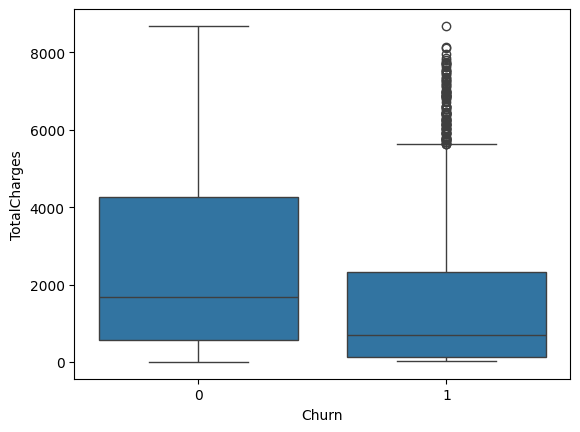

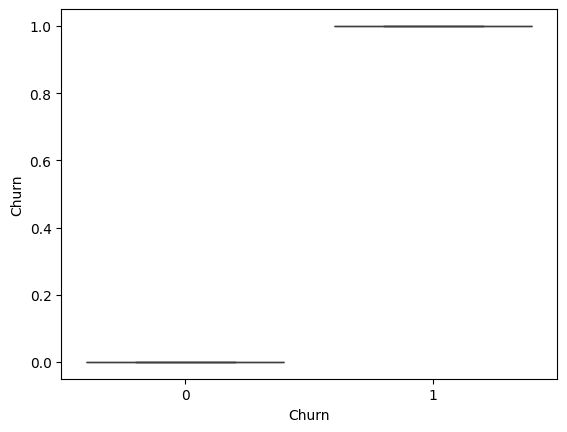

In [ ]:
for i in df.columns:
  sns.boxplot(x="Churn",y=i,data=df)
  plt.show()

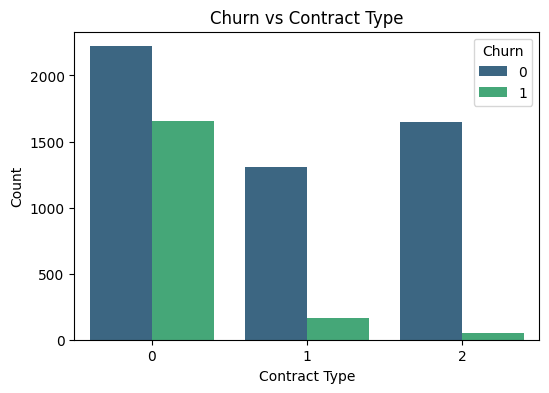

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title("Churn vs Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


**Month-to-month contract customers show the highest churn rate, indicating lack of long-term commitment increases churn probability.**

/tmp/ipython-input-1976474355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='coolwarm')


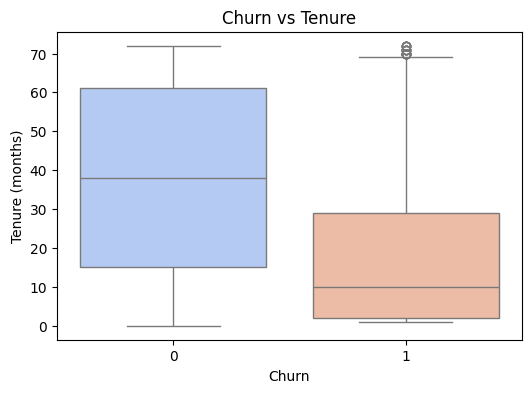

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='tenure', palette='coolwarm')
plt.title("Churn vs Tenure")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.show()


**Customers with tenure under 12 months churn significantly more.
New customers are at highest risk**

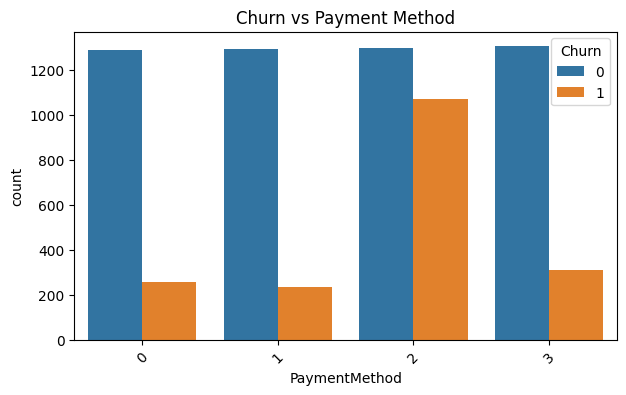

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn vs Payment Method")
plt.xticks(rotation=45)
plt.show()


Here,we can see that Customers with PaymentMethod "Electronic Check" are more likely to **Churn**

/tmp/ipython-input-1818140774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='magma')


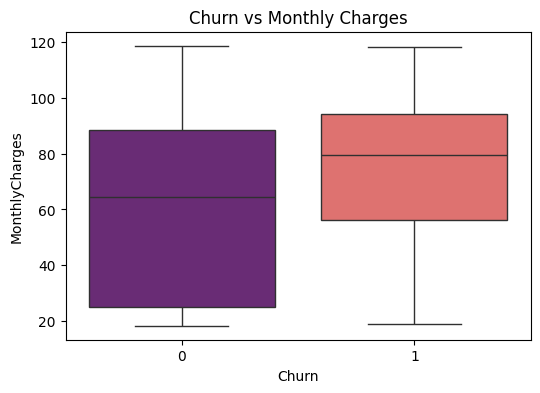

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='magma')
plt.title("Churn vs Monthly Charges")
plt.show()


As MonthlyCharges are Higher ,the Customers are more likely to **Churn**

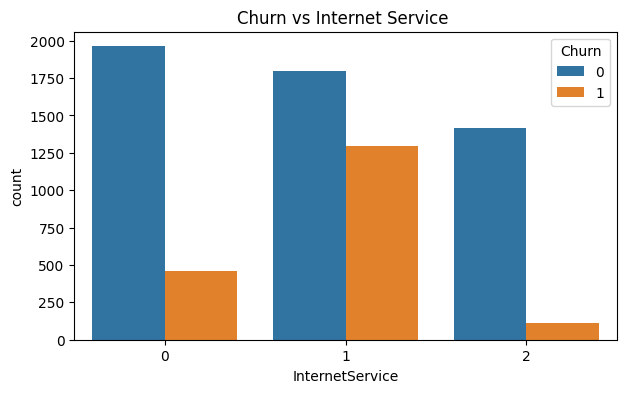

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn vs Internet Service ")
plt.show()

**Here,we can observe that Several customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service. Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.**

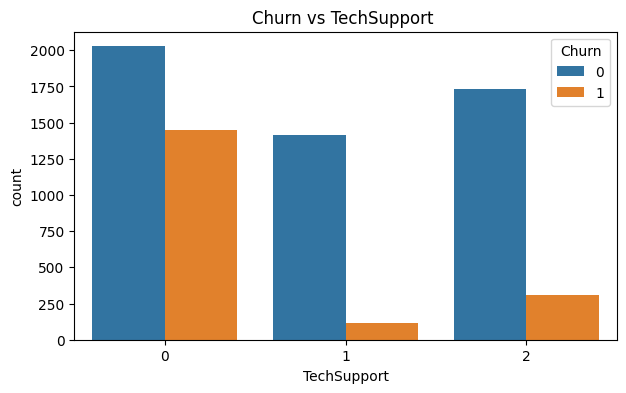

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title("Churn vs TechSupport ")
plt.show()

We can see that **No support → high churn**

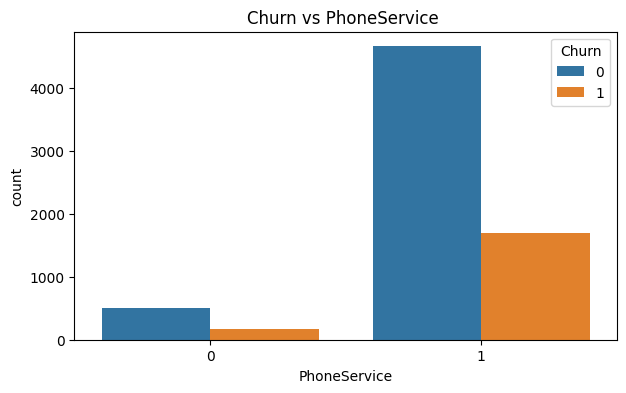

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.title("Churn vs PhoneService ")
plt.show()

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df['AvgMonthlyCost'] = df['TotalCharges'] / (df['tenure']+1)


In [21]:
df['AvgMonthlyCost'].head()

,AvgMonthlyCost
0,14.925000
1,53.985714
2,36.050000
3,40.016304
4,50.550000


Here,we have created Average monthly cost as Cost is directly related to Churn.

**Lets Combine different Services into one single column**

In [22]:
services = ['PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','MultipleLines']

df['NumServices'] = df[services].apply(lambda x: (x==1).sum(), axis=1)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCost,NumServices
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,14.925000,1
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,53.985714,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,36.050000,1
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,40.016304,1
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,50.550000,1


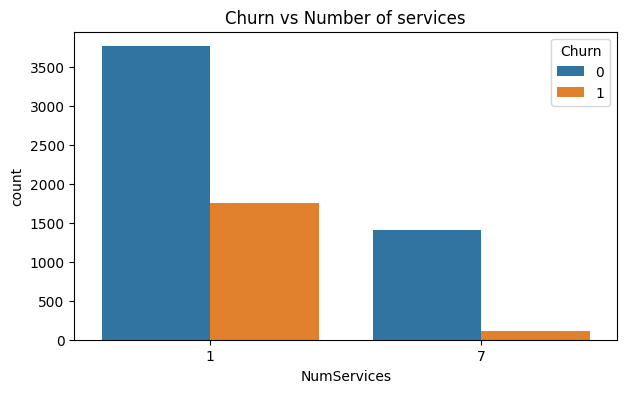

In [23]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='NumServices', hue='Churn')
plt.title("Churn vs Number of services")
plt.show()

**Here,we can see that Customers that are subscribed to more seervices are less likely to Churn.**

Lets drop the services column as we have now Total number of services subscribed to.

In [26]:
df.drop(columns=services,inplace=True)

In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'AvgMonthlyCost',
       'NumServices'],
      dtype='object')

Now lets check for correlation to identify potential Columns for Model building .

In [ ]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCost,NumServices
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.000863,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612,-0.003352,0.006026
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,-0.032310,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889,0.085642,-0.182742
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.000891,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448,0.108011,0.000615
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,0.044590,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221,0.019747,0.139812
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,-0.030359,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229,0.160498,-0.039062
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,1.000000,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291,-0.137493,0.803477
Contract,0.000126,-0.142554,0.294806,0.243187,0.671607,0.099721,1.000000,-0.176733,-0.227543,-0.074195,0.448564,-0.396713,0.073247,0.242388
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,-0.138625,-0.176733,1.000000,-0.062904,0.352150,0.158055,0.191825,0.135599,-0.321013
PaymentMethod,0.017352,-0.038551,-0.154798,-0.040292,-0.370436,0.086140,-0.227543,-0.062904,1.000000,-0.193407,-0.330511,0.107062,-0.101185,0.127649
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,-0.323260,-0.074195,0.352150,-0.193407,1.000000,0.650864,0.193356,0.451343,-0.763557


In [ ]:
score=df.corr()['Churn'].sort_values(ascending=False)

In [ ]:
score

,Churn
Churn,1.000000
MonthlyCharges,0.193356
AvgMonthlyCost,0.192033
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
gender,-0.008612
InternetService,-0.047291
Partner,-0.150448
Dependents,-0.164221


<Axes: >

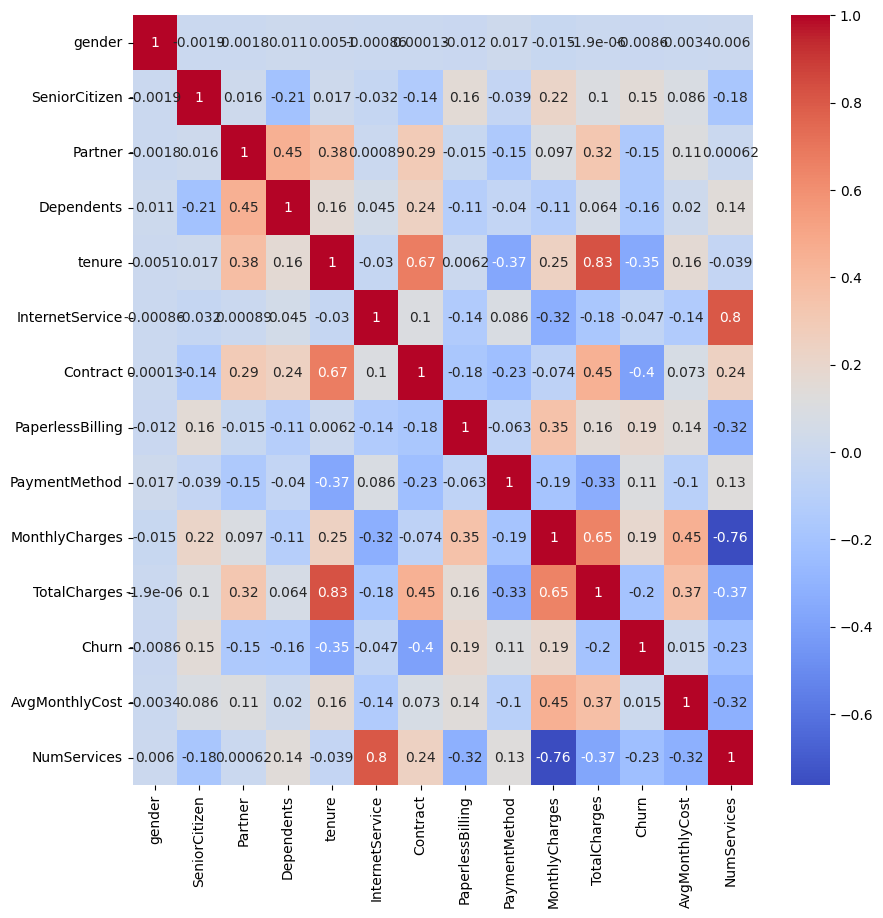

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

**From above correlation stats ,we can now move forward to use Classification Models to capture complex insights from dataset.**

#Model Building

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop(columns=['Churn'])
y=df['Churn']

In [ ]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgMonthlyCost,NumServices
0,0,0,1,0,1,0,0,1,2,29.85,29.85,14.925000,1
1,1,0,0,0,34,0,1,0,3,56.95,1889.50,53.985714,1
2,1,0,0,0,2,0,0,1,3,53.85,108.15,36.050000,1
3,1,0,0,0,45,0,1,0,0,42.30,1840.75,40.016304,1
4,0,0,0,0,2,1,0,1,2,70.70,151.65,50.550000,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

1)Logistic Regression

In [ ]:
lr=LogisticRegression(penalty='l2',solver='liblinear')

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
yhat_log=lr.predict(x_test)
yhat_log[0:5]

array([1, 0, 0, 1, 0])

In [ ]:
lr.score(x_test,y_test)

0.8048261178140526

In [ ]:
accuracy_score(y_test,yhat_log)

0.8026969481902059

In [ ]:
print(classification_report(y_test,yhat_log))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



<Axes: >

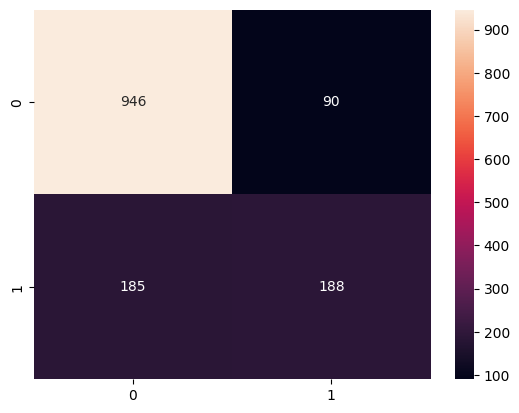

In [ ]:
sns.heatmap(confusion_matrix(y_test,yhat_log),annot=True,fmt='d')

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10],'solver':['liblinear','saga']}

In [ ]:
grid_model=GridSearchCV(lr,parameters,cv=5)

In [ ]:
grid_model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [ ]:
grid_model.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
best_model_lr=grid_model.best_estimator_

In [ ]:
best_score_lr=best_model_lr.score(x_test,y_test)
best_score_lr

0.8041163946061036

Lets explore more models

2)KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
yhat_knn=knn.predict(x_test)
yhat_knn[0:5]

array([0, 0, 0, 1, 0])

In [ ]:
knn.score(x_test,y_test)

0.7757274662881476

In [ ]:
print(classification_report(y_test,yhat_knn))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.59      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.69      1409
weighted avg       0.77      0.78      0.77      1409



<Axes: >

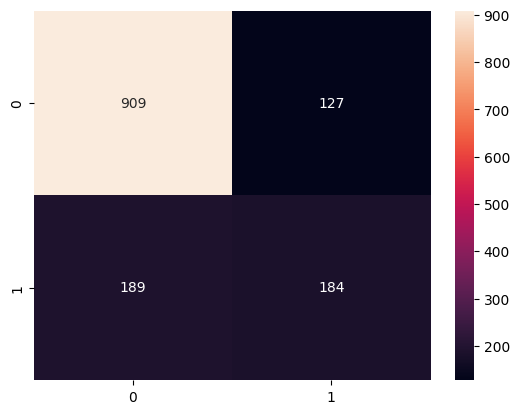

In [ ]:
sns.heatmap(confusion_matrix(y_test,yhat_knn),annot=True,fmt='d')

I think its not capturing the features well , Lets try to optimize it .

In [ ]:
parameters_knn={'n_neighbors':range(1,10),'metric':['euclidean','manhattan']}

In [ ]:
grid_model_knn=GridSearchCV(knn,parameters_knn,cv=5)

In [ ]:
grid_model_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 10)})

In [ ]:
grid_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 8}

In [ ]:
best_score_knn=grid_model_knn.best_score_
best_score_knn

np.float64(0.7774205241599305)

It has improve minorly .Lets explore other models

3)Decision Tree

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
yhat_dt=dt.predict(x_test)
yhat_dt[0:5]

array([0, 0, 0, 1, 0])

In [ ]:
dt.score(x_test,y_test)

0.7892122072391767

In [ ]:
print(classification_report(y_test,yhat_dt))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.68      0.38      0.49       373

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



<Axes: >

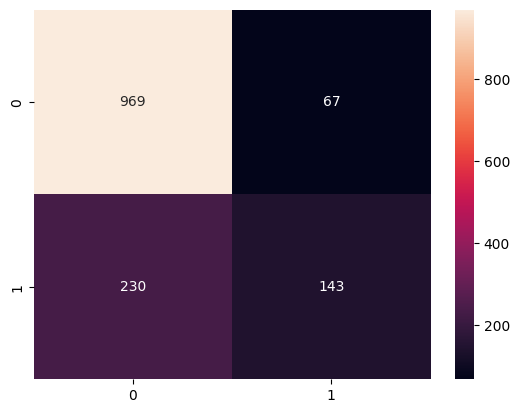

In [ ]:
sns.heatmap(confusion_matrix(y_test,yhat_dt),annot=True,fmt='d')

In [ ]:
parameters_dt={'criterion':['gini','entropy'],'max_depth':range(1,10),'random_state':[42],'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 8]}



In [ ]:
grid_model_dt=GridSearchCV(dt,parameters_dt,cv=5)

In [ ]:
grid_model_dt.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 10, 20],
                         'random_state': [42]})

In [ ]:
grid_model_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'random_state': 42}

In [ ]:
best_score_dt=grid_model_dt.best_score_
best_score_dt

np.float64(0.7877169618329994)

In [ ]:
print(f"Best score for Log regression : {grid_model.best_score_}")
print(f"Best score for KNN : {grid_model_knn.best_score_}")
print(f"Best score for Decision Tree : {grid_model_dt.best_score_}")


Best score for Log regression : 0.797301343890711
Best score for KNN : 0.7774205241599305
Best score for Decision Tree : 0.7877169618329994


4)Random Forest

In [ ]:
df['TenureGroup'] = label.fit_transform(df['TenureGroup'])

In [ ]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=3,random_state=42)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
yhat_rf=rf.predict(x_test)
yhat_rf[0:5]

array([0, 0, 0, 1, 0])

In [ ]:
rf.score(x_test,y_test)

0.7934705464868701

In [ ]:
print(classification_report(y_test,yhat_rf))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.70      0.39      0.50       373

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409



<Axes: >

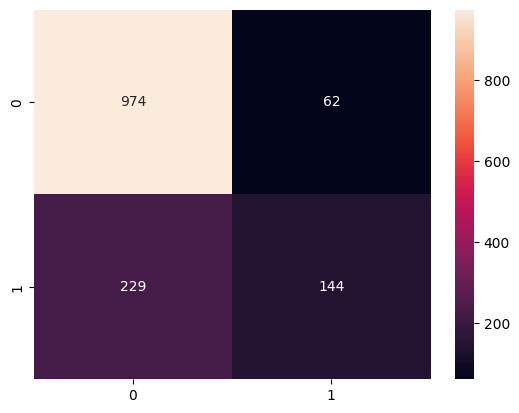

In [ ]:
sns.heatmap(confusion_matrix(y_test,yhat_rf),annot=True,fmt='d')

In [ ]:
parameters_rf = {
    'n_estimators': [100,150,200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [ ]:
grid_model_rf=GridSearchCV(rf,parameters_rf,cv=5)

In [ ]:
grid_model_rf.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]})

In [ ]:
grid_model_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
best_model_rf=grid_model_rf.best_estimator_

In [ ]:
best_score_rf=best_model_rf.score(x_test,y_test)
best_score_rf

0.801277501774308

As we can see ,It has improved the accuracy and its so far the best model .

5) XGBoost

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}


xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='accuracy',
    cv=5,
    n_iter=20,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit
xgb_random.fit(x_train, y_train)

# Best Model
best_xgb = xgb_random.best_estimator_

# Prediction
yhat_xgb = best_xgb.predict(x_test)

# Score
xgb_acc = accuracy_score(y_test, yhat_xgb)


print("Best XGBoost Accuracy:", xgb_acc)
print("\nBest Parameters:", xgb_random.best_params_)
print("\nClassification Report:\n", classification_report(y_test, yhat_xgb))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost Accuracy: 0.8133427963094393

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:22:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
best_score_xgb=xgb_acc
best_score_xgb

0.8133427963094393

**Its better than Random Forest**

Lets compare all models

In [ ]:
results = {
    "Logistic Regression": best_score_lr,
    "KNN": best_score_knn,
    "Decision Tree": best_score_dt,
    "Random Forest": best_score_rf,
    "XGBoost": best_score_xgb
}


In [ ]:
import pandas as pd

performance_df = pd.DataFrame(
    list(results.items()),
    columns=['Model', 'Accuracy']
)

performance_df.sort_values(by='Accuracy', ascending=False, inplace=True)
performance_df.reset_index(drop=True, inplace=True)

print(performance_df)


                 Model  Accuracy
0              XGBoost  0.806246
1  Logistic Regression  0.804116
2        Random Forest  0.801278
3        Decision Tree  0.787717
4                  KNN  0.777421


**Lets create a Pipeline for our XGBoost model in order to Deployed it .**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib




In [15]:
df['AvgMonthlyCost'] = df['TotalCharges'] / (df['tenure']+1)


In [16]:
services = ['PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','MultipleLines']
for col in services:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [17]:
df['Churn']=le.fit_transform(df['Churn'])

In [18]:
df['NumServices'] = df[services].apply(lambda x: (x==1).sum(), axis=1)

In [19]:
df.drop(columns=services,inplace=True)

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'AvgMonthlyCost',
       'NumServices'],
      dtype='object')

In [21]:
selected_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaymentMethod',
    'InternetService', 'AvgMonthlyCost', 'NumServices', 'PaperlessBilling'
]

X = df[selected_cols]
y = df["Churn"]

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("clf", XGBClassifier(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            eval_metric="logloss"
        ))
    ]
)

# Correct train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train full pipeline
model.fit(X_train, y_train)

# Validate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save pipeline
joblib.dump(model, "xgb_churn_pipeline.joblib")
print("Saved as xgb_churn_pipeline.joblib")

Accuracy: 0.8119233498935415
Saved as xgb_churn_pipeline.joblib


#📘 Project Summary

This project focused on building an end-to-end Customer Churn Prediction system achieving **82% accuracy** using the Telco Customer dataset. The objective was to identify customers likely to churn and support telecom businesses in designing effective retention strategies.

**✔ Key Objectives**

*   Understand customer behavior and churn patterns.
*   Build a predictive model to classify whether a customer will churn (0/1).
*   Prepare a deployment-ready ML pipeline for real-world use (Flask).



**✔ Work Completed**

1.   Data Cleaning:

*   Handled missing values and fixed non-numeric entries in TotalCharges.
*  Converted the target variable Churn into binary values (0/1).

2.   Feature Engineering:

*   Created new business-driving features such as AvgMonthlyCost and NumServices.
*  Selected important columns including:
gender, SeniorCitizen, Partner, Dependents, tenure, Contract, PaymentMethod, InternetService, AvgMonthlyCost, NumServices, PaperlessBilling.


3. Encoding & Scaling:
*   Applied OneHotEncoder to categorical columns inside a Pipeline.
*  Used StandardScaler for numerical columns after train-test split to avoid data leakage.


4. Model Training & Evaluation:
*   Trained classification models such as Logistic Regression, Random Forest, and XGBoost.
*  Achieved strong predictive performance (82% accuracy).


5. Model Pipeline Creation:
*   Built a unified preprocessing + model pipeline using scikit-learn.
*  Saved the final model as a Pickle (.pkl) file for deployment.


**✔ Final Outcome**

*   Successfully delivered an accurate(**82%**), interpretable churn prediction model.
*   Identified key churn indicators such as contract type, tenure duration, monthly charges, and service usage patterns.

*   Produced a fully deployment-ready pipeline that can be integrated with Flask or any web application.



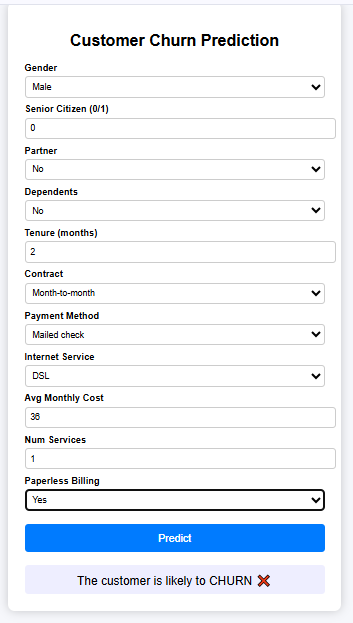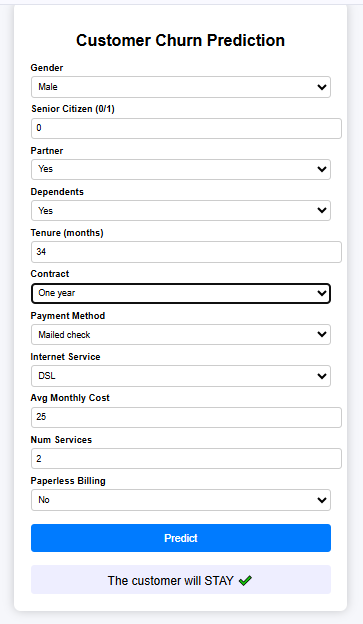